In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

In [2]:
df_accident = pd.read_csv("C:/Users/USSB697670/Desktop/GeorgiaTech/Data Mining & Statistical Learning/Projects/Accident_Information.csv",encoding='unicode_escape')

In [3]:
df_vehicle = pd.read_csv("C:/Users/USSB697670/Desktop/GeorgiaTech/Data Mining & Statistical Learning/Projects/Vehicle_Information.csv", encoding='unicode_escape')

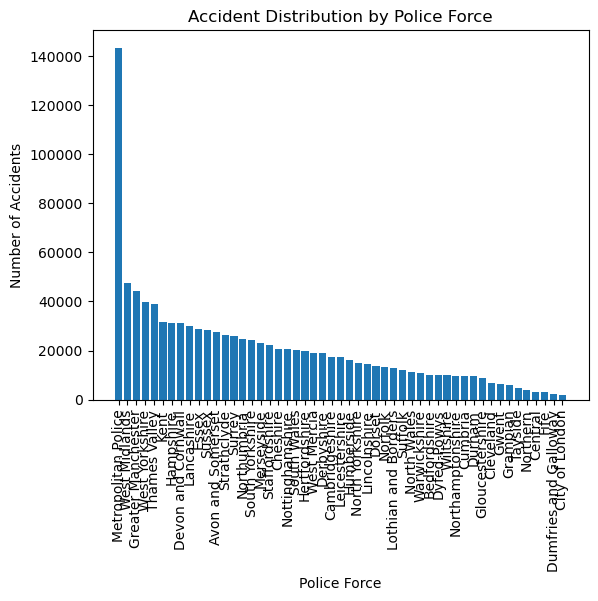

In [4]:
df_a = pd.DataFrame(df_accident)

accidents_num_jc = df_a['Police_Force'].value_counts()

plt.bar(accidents_num_jc.index, accidents_num_jc.values)
plt.xlabel('Police Force')
plt.ylabel('Number of Accidents')
plt.title('Accident Distribution by Police Force')
plt.xticks(rotation='vertical')
plt.show()

In [5]:
df = pd.merge(df_accident, df_vehicle, on='Accident_Index')

In [6]:
df_f = df.iloc[:, [0,5,7,8,10,11,25,26,28,29,30,31,32,34,35,38,43,44,45,46,51]]

In [7]:
df_f

,Accident_Index,Accident_Severity,Date,Day_of_Week,Junction_Control,Junction_Detail,Road_Surface_Conditions,Road_Type,Speed_limit,Time,...,Weather_Conditions,Year_x,Age_Band_of_Driver,Age_of_Vehicle,Engine_Capacity_.CC.,make,model,Propulsion_Code,Sex_of_Driver,Vehicle_Manoeuvre
0,200501BS00002,Slight,1/5/2005,Wednesday,Auto traffic signal,Crossroads,Dry,Dual carriageway,30,17:36,...,Fine no high winds,2005,36 - 45,3.0,8268.0,DENNIS,NaN,Heavy oil,Male,Slowing or stopping
1,200501BS00003,Slight,1/6/2005,Thursday,Data missing or out of range,Not at junction or within 20 metres,Dry,Single carriageway,30,0:15,...,Fine no high winds,2005,26 - 35,5.0,8300.0,DENNIS,NaN,Heavy oil,Male,Going ahead right-hand bend
2,200501BS00004,Slight,1/7/2005,Friday,Data missing or out of range,Not at junction or within 20 metres,Dry,Single carriageway,30,10:35,...,Fine no high winds,2005,46 - 55,4.0,1769.0,NISSAN,ALMERA SE AUTO,Petrol,Female,Going ahead other
3,200501BS00005,Slight,1/10/2005,Monday,Data missing or out of range,Not at junction or within 20 metres,Wet or damp,Single carriageway,30,21:13,...,Fine no high winds,2005,46 - 55,10.0,85.0,HONDA,NaN,Petrol,Male,Going ahead other
4,200501BS00006,Slight,1/11/2005,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Wet or damp,Single carriageway,30,12:40,...,Raining no high winds,2005,46 - 55,1.0,2976.0,AUDI,A4 SPORT CABRIOLET AUTO,Petrol,Male,Moving off
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528781,201091NM01935,Slight,2/23/2010,Tuesday,Give way or uncontrolled,T or staggered junction,Frost or ice,Single carriageway,30,9:38,...,Fine no high winds,2010,46 - 55,NaN,NaN,RENAULT,KANGOO ML19 PLUS 85 DCI,NaN,Male,Slowing or stopping
528782,201091NM01935,Slight,2/23/2010,Tuesday,Give way or uncontrolled,T or staggered junction,Frost or ice,Single carriageway,30,9:38,...,Fine no high winds,2010,46 - 55,NaN,NaN,FORD,RANGER 4X4 TURBO DIESEL,NaN,Male,Slowing or stopping
528783,201091NM01964,Serious,2/23/2010,Tuesday,Give way or uncontrolled,T or staggered junction,Wet or damp,Single carriageway,60,18:25,...,Fine no high winds,2010,36 - 45,11.0,955.0,TRIUMPH,SPRINT ST,Petrol,Male,Going ahead other
528784,201091NM01964,Serious,2/23/2010,Tuesday,Give way or uncontrolled,T or staggered junction,Wet or damp,Single carriageway,60,18:25,...,Fine no high winds,2010,46 - 55,NaN,NaN,FORD,FIESTA 35,NaN,Male,Turning right


# Exploratory Data Analysis

In [8]:
df_f.describe()

,Speed_limit,Year_x,Age_of_Vehicle,Engine_Capacity_.CC.
count,528786.000000,528786.000000,459227.000000,483509.000000
mean,39.312964,2007.789264,6.382345,2151.774726
std,14.294410,1.716493,4.468305,2123.511077
min,10.000000,2005.000000,1.000000,1.000000
25%,30.000000,2006.000000,3.000000,1299.000000
50%,30.000000,2008.000000,6.000000,1686.000000
75%,50.000000,2009.000000,9.000000,1998.000000
max,70.000000,2010.000000,85.000000,96000.000000


In [9]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528786 entries, 0 to 528785
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Accident_Index           528786 non-null  object 
 1   Accident_Severity        528786 non-null  object 
 2   Date                     528786 non-null  object 
 3   Day_of_Week              528786 non-null  object 
 4   Junction_Control         528786 non-null  object 
 5   Junction_Detail          528786 non-null  object 
 6   Road_Surface_Conditions  528786 non-null  object 
 7   Road_Type                528786 non-null  object 
 8   Speed_limit              528786 non-null  int64  
 9   Time                     528784 non-null  object 
 10  Urban_or_Rural_Area      528786 non-null  object 
 11  Weather_Conditions       528786 non-null  object 
 12  Year_x                   528786 non-null  int64  
 13  Age_Band_of_Driver       528786 non-null  object 
 14  Age_

In [10]:
#Check the count of null values in the columns
df_f.isnull().sum()

Accident_Index                 0
Accident_Severity              0
Date                           0
Day_of_Week                    0
Junction_Control               0
Junction_Detail                0
Road_Surface_Conditions        0
Road_Type                      0
Speed_limit                    0
Time                           2
Urban_or_Rural_Area            0
Weather_Conditions             0
Year_x                         0
Age_Band_of_Driver             0
Age_of_Vehicle             69559
Engine_Capacity_.CC.       45277
make                           0
model                      75666
Propulsion_Code            37301
Sex_of_Driver                  0
Vehicle_Manoeuvre              0
dtype: int64

In [11]:
#Dropped rows having null values for any of the columns 
df_clean=df_f.dropna()
#Check if there are any null values in those columns
df_clean.isnull().any()

Accident_Index             False
Accident_Severity          False
Date                       False
Day_of_Week                False
Junction_Control           False
Junction_Detail            False
Road_Surface_Conditions    False
Road_Type                  False
Speed_limit                False
Time                       False
Urban_or_Rural_Area        False
Weather_Conditions         False
Year_x                     False
Age_Band_of_Driver         False
Age_of_Vehicle             False
Engine_Capacity_.CC.       False
make                       False
model                      False
Propulsion_Code            False
Sex_of_Driver              False
Vehicle_Manoeuvre          False
dtype: bool

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393885 entries, 2 to 528785
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Accident_Index           393885 non-null  object 
 1   Accident_Severity        393885 non-null  object 
 2   Date                     393885 non-null  object 
 3   Day_of_Week              393885 non-null  object 
 4   Junction_Control         393885 non-null  object 
 5   Junction_Detail          393885 non-null  object 
 6   Road_Surface_Conditions  393885 non-null  object 
 7   Road_Type                393885 non-null  object 
 8   Speed_limit              393885 non-null  int64  
 9   Time                     393885 non-null  object 
 10  Urban_or_Rural_Area      393885 non-null  object 
 11  Weather_Conditions       393885 non-null  object 
 12  Year_x                   393885 non-null  int64  
 13  Age_Band_of_Driver       393885 non-null  object 
 14  Age_of_Ve

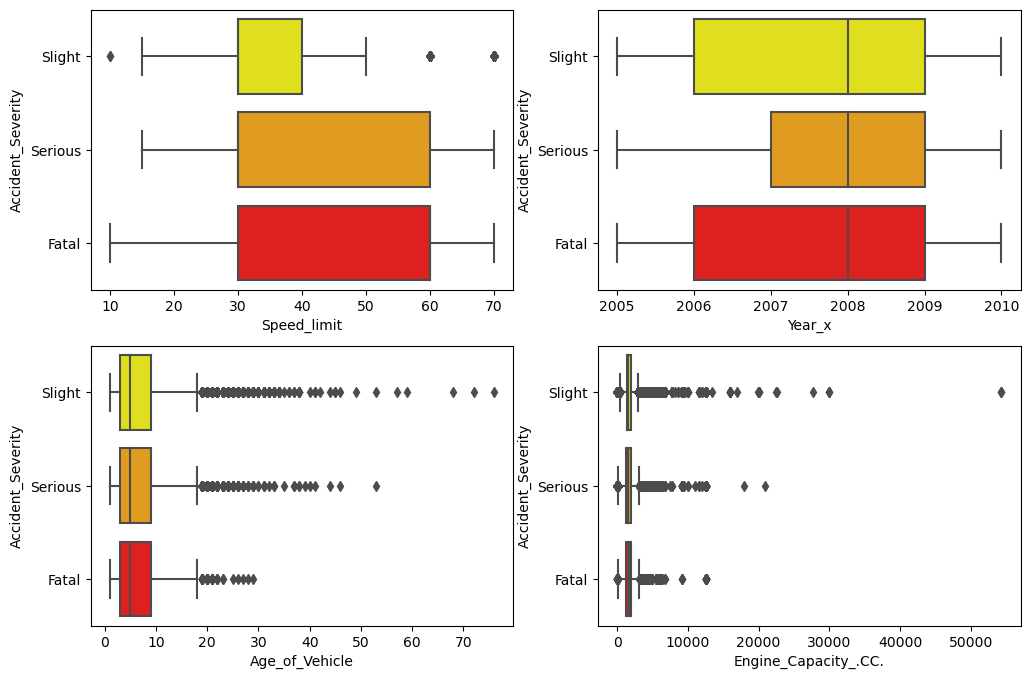

In [13]:
#Box plot of numerical variables
var=["Speed_limit","Year_x","Age_of_Vehicle","Engine_Capacity_.CC."]
plt.figure(figsize=(12,8))
for i in range(0,len(var)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df_clean[var[i]],y=df_clean['Accident_Severity'],palette={"Slight":"Yellow","Serious":"Orange","Fatal":"Red"})
    plt.xlabel(var[i])

In [14]:
df_clean

,Accident_Index,Accident_Severity,Date,Day_of_Week,Junction_Control,Junction_Detail,Road_Surface_Conditions,Road_Type,Speed_limit,Time,...,Weather_Conditions,Year_x,Age_Band_of_Driver,Age_of_Vehicle,Engine_Capacity_.CC.,make,model,Propulsion_Code,Sex_of_Driver,Vehicle_Manoeuvre
2,200501BS00004,Slight,1/7/2005,Friday,Data missing or out of range,Not at junction or within 20 metres,Dry,Single carriageway,30,10:35,...,Fine no high winds,2005,46 - 55,4.0,1769.0,NISSAN,ALMERA SE AUTO,Petrol,Female,Going ahead other
4,200501BS00006,Slight,1/11/2005,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Wet or damp,Single carriageway,30,12:40,...,Raining no high winds,2005,46 - 55,1.0,2976.0,AUDI,A4 SPORT CABRIOLET AUTO,Petrol,Male,Moving off
5,200501BS00006,Slight,1/11/2005,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Wet or damp,Single carriageway,30,12:40,...,Raining no high winds,2005,26 - 35,2.0,124.0,PIAGGIO,VESPA ET4,Petrol,Female,Going ahead other
7,200501BS00007,Slight,1/13/2005,Thursday,Give way or uncontrolled,T or staggered junction,Dry,Single carriageway,30,20:40,...,Fine no high winds,2005,36 - 45,4.0,4266.0,MERCEDES,ML 430 AUTO,Petrol,Male,Parked
8,200501BS00009,Slight,1/14/2005,Friday,Data missing or out of range,Not at junction or within 20 metres,Dry,Dual carriageway,30,17:35,...,Fine no high winds,2005,66 - 75,16.0,5343.0,JAGUAR,XJ-S CONVERTIBLE AUTO,Petrol,Male,Going ahead other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528775,201091NM01085,Serious,1/29/2010,Friday,Give way or uncontrolled,Slip road,Snow,Single carriageway,60,14:01,...,Fine no high winds,2010,21 - 25,1.0,1796.0,VAUXHALL,ASTRA DESIGN,Petrol,Female,Changing lane to right
528779,201091NM01881,Slight,2/21/2010,Sunday,Data missing or out of range,Not at junction or within 20 metres,Frost or ice,Single carriageway,60,3:00,...,Fine no high winds,2010,21 - 25,12.0,1242.0,FIAT,PUNTO 60 TEAM,Petrol,Male,Going ahead right-hand bend
528780,201091NM01935,Slight,2/23/2010,Tuesday,Give way or uncontrolled,T or staggered junction,Frost or ice,Single carriageway,30,9:38,...,Fine no high winds,2010,26 - 35,2.0,1997.0,FORD,MONDEO EDGE TDCI 140,Heavy oil,Male,Waiting to turn right
528783,201091NM01964,Serious,2/23/2010,Tuesday,Give way or uncontrolled,T or staggered junction,Wet or damp,Single carriageway,60,18:25,...,Fine no high winds,2010,36 - 45,11.0,955.0,TRIUMPH,SPRINT ST,Petrol,Male,Going ahead other


In [17]:
#Convert String Variables to Categorical values
non_numeric_cols=df_clean.select_dtypes(exclude=['number']).columns
df_strings=df_clean[non_numeric_cols]
df_strings

,Accident_Index,Accident_Severity,Date,Day_of_Week,Junction_Control,Junction_Detail,Road_Surface_Conditions,Road_Type,Time,Urban_or_Rural_Area,Weather_Conditions,Age_Band_of_Driver,make,model,Propulsion_Code,Sex_of_Driver,Vehicle_Manoeuvre
2,200501BS00004,Slight,1/7/2005,Friday,Data missing or out of range,Not at junction or within 20 metres,Dry,Single carriageway,10:35,Urban,Fine no high winds,46 - 55,NISSAN,ALMERA SE AUTO,Petrol,Female,Going ahead other
4,200501BS00006,Slight,1/11/2005,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Wet or damp,Single carriageway,12:40,Urban,Raining no high winds,46 - 55,AUDI,A4 SPORT CABRIOLET AUTO,Petrol,Male,Moving off
5,200501BS00006,Slight,1/11/2005,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Wet or damp,Single carriageway,12:40,Urban,Raining no high winds,26 - 35,PIAGGIO,VESPA ET4,Petrol,Female,Going ahead other
7,200501BS00007,Slight,1/13/2005,Thursday,Give way or uncontrolled,T or staggered junction,Dry,Single carriageway,20:40,Urban,Fine no high winds,36 - 45,MERCEDES,ML 430 AUTO,Petrol,Male,Parked
8,200501BS00009,Slight,1/14/2005,Friday,Data missing or out of range,Not at junction or within 20 metres,Dry,Dual carriageway,17:35,Urban,Fine no high winds,66 - 75,JAGUAR,XJ-S CONVERTIBLE AUTO,Petrol,Male,Going ahead other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528775,201091NM01085,Serious,1/29/2010,Friday,Give way or uncontrolled,Slip road,Snow,Single carriageway,14:01,Rural,Fine no high winds,21 - 25,VAUXHALL,ASTRA DESIGN,Petrol,Female,Changing lane to right
528779,201091NM01881,Slight,2/21/2010,Sunday,Data missing or out of range,Not at junction or within 20 metres,Frost or ice,Single carriageway,3:00,Rural,Fine no high winds,21 - 25,FIAT,PUNTO 60 TEAM,Petrol,Male,Going ahead right-hand bend
528780,201091NM01935,Slight,2/23/2010,Tuesday,Give way or uncontrolled,T or staggered junction,Frost or ice,Single carriageway,9:38,Rural,Fine no high winds,26 - 35,FORD,MONDEO EDGE TDCI 140,Heavy oil,Male,Waiting to turn right
528783,201091NM01964,Serious,2/23/2010,Tuesday,Give way or uncontrolled,T or staggered junction,Wet or damp,Single carriageway,18:25,Rural,Fine no high winds,36 - 45,TRIUMPH,SPRINT ST,Petrol,Male,Going ahead other


In [18]:
#Convert String varaibles to categorical variables 
df_strings =df_strings.astype("category")
df_strings.dtypes

Accident_Index             category
Accident_Severity          category
Date                       category
Day_of_Week                category
Junction_Control           category
Junction_Detail            category
Road_Surface_Conditions    category
Road_Type                  category
Time                       category
Urban_or_Rural_Area        category
Weather_Conditions         category
Age_Band_of_Driver         category
make                       category
model                      category
Propulsion_Code            category
Sex_of_Driver              category
Vehicle_Manoeuvre          category
dtype: object

In [19]:
#Check the categorical values of columns 
for i in df_strings.select_dtypes(include=['category']):
    print(i)
    print(df_strings[i].value_counts())

Accident_Index
Accident_Index
2009559D05333    18
201006XP26465    11
201006L040187    10
201005DD02390    10
200911NE16289    10
                 ..
200722EA86585     1
200722EA86620     1
200722EA86622     1
200722EA86623     1
201091NM02142     1
Name: count, Length: 316461, dtype: int64
Accident_Severity
Accident_Severity
Slight     344234
Serious     45003
Fatal        4648
Name: count, dtype: int64
Date
Date
2/1/2010      409
10/1/2010     396
10/6/2009     395
1/30/2010     393
7/17/2009     387
             ... 
1/1/2006       60
12/25/2005     54
12/25/2007     48
12/25/2006     47
12/25/2008     44
Name: count, Length: 2191, dtype: int64
Day_of_Week
Day_of_Week
Friday       64758
Wednesday    59327
Tuesday      58668
Thursday     58441
Monday       55267
Saturday     53414
Sunday       44010
Name: count, dtype: int64
Junction_Control
Junction_Control
Give way or uncontrolled               198183
Data missing or out of range           113662
Auto traffic signal                

In [20]:
df_cat_model = df_strings.iloc[:,[1,4,5,6,7,9,10,11,15,16]]


In [21]:
df_cat_model['Accident_Severity'] = df_cat_model['Accident_Severity'].replace(['Serious', 'Fatal'], 'Serious or Fatal')

In [22]:
df_cat_model = pd.get_dummies(df_cat_model, columns=['Accident_Severity'])
df_cat_model = df_cat_model.drop('Accident_Severity_Serious or Fatal', axis=1)
df_cat_model.Accident_Severity_Slight.value_counts(normalize=True)
df_cat_model['Accident_Severity_Slight'] = df_cat_model['Accident_Severity_Slight'].astype("int")

In [23]:
df_cat_model

,Junction_Control,Junction_Detail,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Age_Band_of_Driver,Sex_of_Driver,Vehicle_Manoeuvre,Accident_Severity_Slight
2,Data missing or out of range,Not at junction or within 20 metres,Dry,Single carriageway,Urban,Fine no high winds,46 - 55,Female,Going ahead other,1
4,Data missing or out of range,Not at junction or within 20 metres,Wet or damp,Single carriageway,Urban,Raining no high winds,46 - 55,Male,Moving off,1
5,Data missing or out of range,Not at junction or within 20 metres,Wet or damp,Single carriageway,Urban,Raining no high winds,26 - 35,Female,Going ahead other,1
7,Give way or uncontrolled,T or staggered junction,Dry,Single carriageway,Urban,Fine no high winds,36 - 45,Male,Parked,1
8,Data missing or out of range,Not at junction or within 20 metres,Dry,Dual carriageway,Urban,Fine no high winds,66 - 75,Male,Going ahead other,1
...,...,...,...,...,...,...,...,...,...,...
528775,Give way or uncontrolled,Slip road,Snow,Single carriageway,Rural,Fine no high winds,21 - 25,Female,Changing lane to right,0
528779,Data missing or out of range,Not at junction or within 20 metres,Frost or ice,Single carriageway,Rural,Fine no high winds,21 - 25,Male,Going ahead right-hand bend,1
528780,Give way or uncontrolled,T or staggered junction,Frost or ice,Single carriageway,Rural,Fine no high winds,26 - 35,Male,Waiting to turn right,1
528783,Give way or uncontrolled,T or staggered junction,Wet or damp,Single carriageway,Rural,Fine no high winds,36 - 45,Male,Going ahead other,0


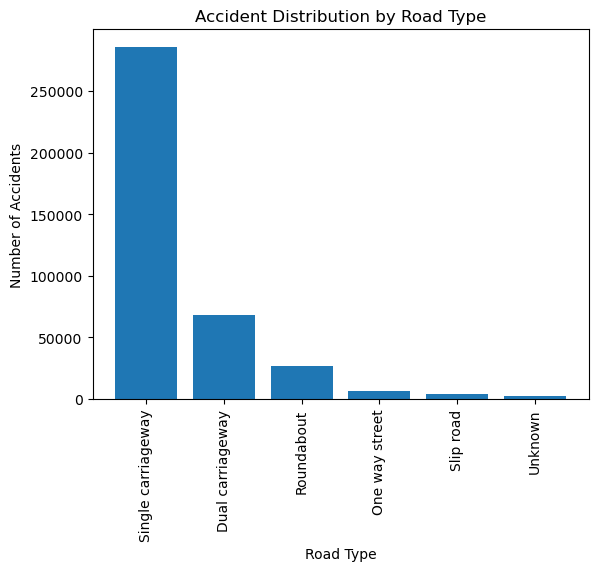

In [24]:
df = pd.DataFrame(df_cat_model)

accidents_num_jc = df['Road_Type'].value_counts()

plt.bar(accidents_num_jc.index, accidents_num_jc.values)
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.title('Accident Distribution by Road Type')
plt.xticks(rotation='vertical')
plt.show()

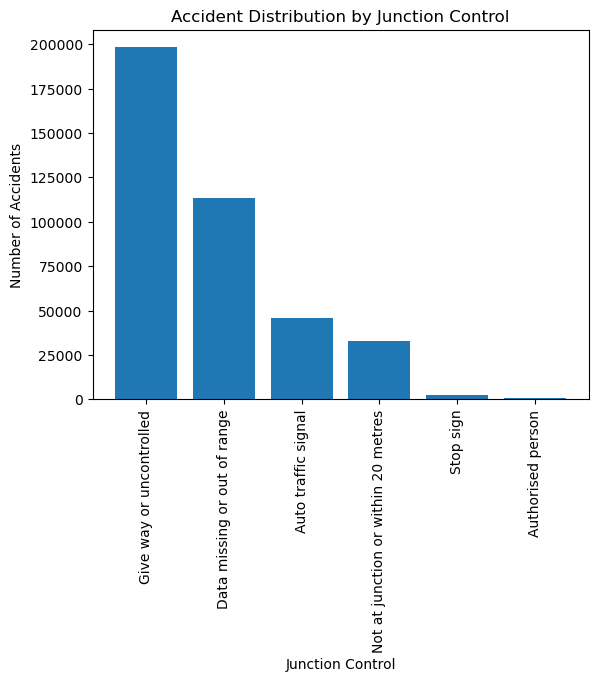

In [25]:
df = pd.DataFrame(df_cat_model)

accidents_num_jc = df['Junction_Control'].value_counts()

plt.bar(accidents_num_jc.index, accidents_num_jc.values)
plt.xlabel('Junction Control')
plt.ylabel('Number of Accidents')
plt.title('Accident Distribution by Junction Control')
plt.xticks(rotation='vertical')
plt.show()

In [26]:
df_cat_model["Vehicle_Manoeuvre"] = df_cat_model["Vehicle_Manoeuvre"].cat.codes
df_cat_model["Sex_of_Driver"] = df_cat_model["Sex_of_Driver"].cat.codes
df_cat_model["Weather_Conditions"] = df_cat_model["Weather_Conditions"].cat.codes
df_cat_model["Urban_or_Rural_Area"] = df_cat_model["Urban_or_Rural_Area"].cat.codes
df_cat_model["Road_Type"] = df_cat_model["Road_Type"].cat.codes
df_cat_model["Road_Surface_Conditions"] = df_cat_model["Road_Surface_Conditions"].cat.codes
df_cat_model["Junction_Detail"] = df_cat_model["Junction_Detail"].cat.codes
df_cat_model["Junction_Control"] = df_cat_model["Junction_Control"].cat.codes
df_cat_model["Age_Band_of_Driver"] = df_cat_model["Age_Band_of_Driver"].cat.codes

In [27]:
df_cat_model

,Junction_Control,Junction_Detail,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Age_Band_of_Driver,Sex_of_Driver,Vehicle_Manoeuvre,Accident_Severity_Slight
2,2,4,1,3,2,2,5,1,4,1
4,2,4,5,3,2,6,5,2,6,1
5,2,4,5,3,2,6,3,1,4,1
7,3,9,1,3,2,2,4,2,10,1
8,2,4,1,0,2,2,8,2,4,1
...,...,...,...,...,...,...,...,...,...,...
528775,3,8,4,3,0,2,2,1,1,0
528779,2,4,3,3,0,2,2,2,5,1
528780,3,9,3,3,0,2,3,2,18,1
528783,3,9,5,3,0,2,4,2,4,0


In [28]:
df_model = pd.concat([df_cat_model, df_clean['Speed_limit']], axis=1)

In [29]:
df_model = pd.concat([df_model, df_clean['Age_of_Vehicle']], axis=1)

In [30]:
df_model = pd.concat([df_model, df_clean['Engine_Capacity_.CC.']], axis=1)

In [31]:
df_model

,Junction_Control,Junction_Detail,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Age_Band_of_Driver,Sex_of_Driver,Vehicle_Manoeuvre,Accident_Severity_Slight,Speed_limit,Age_of_Vehicle,Engine_Capacity_.CC.
2,2,4,1,3,2,2,5,1,4,1,30,4.0,1769.0
4,2,4,5,3,2,6,5,2,6,1,30,1.0,2976.0
5,2,4,5,3,2,6,3,1,4,1,30,2.0,124.0
7,3,9,1,3,2,2,4,2,10,1,30,4.0,4266.0
8,2,4,1,0,2,2,8,2,4,1,30,16.0,5343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
528775,3,8,4,3,0,2,2,1,1,0,60,1.0,1796.0
528779,2,4,3,3,0,2,2,2,5,1,60,12.0,1242.0
528780,3,9,3,3,0,2,3,2,18,1,30,2.0,1997.0
528783,3,9,5,3,0,2,4,2,4,0,60,11.0,955.0


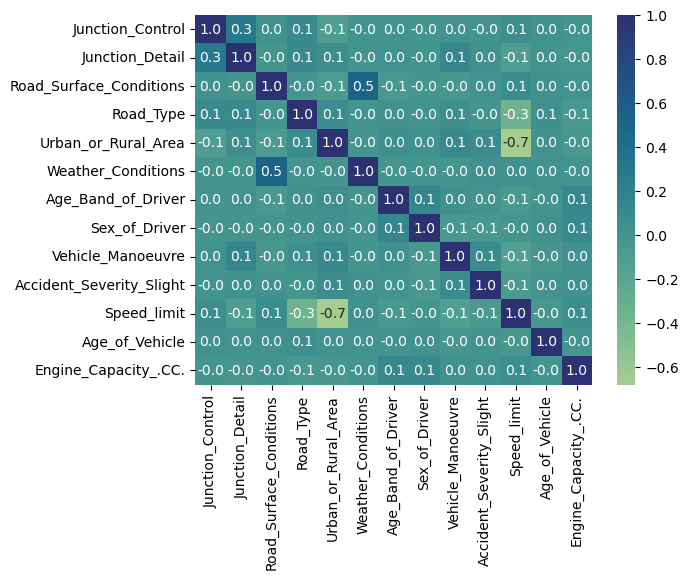

In [32]:
#Correlation between the variables
corr_matrix=df_model.corr();
sns.heatmap(corr_matrix,cmap="crest" ,annot=True,fmt=".1f");

In [33]:
print(corr_matrix)

                          Junction_Control  Junction_Detail  \
Junction_Control                  1.000000         0.292577   
Junction_Detail                   0.292577         1.000000   
Road_Surface_Conditions           0.018016        -0.023303   
Road_Type                         0.110202         0.108978   
Urban_or_Rural_Area              -0.102699         0.055930   
Weather_Conditions               -0.003495        -0.011935   
Age_Band_of_Driver                0.000368         0.011959   
Sex_of_Driver                    -0.022408        -0.015469   
Vehicle_Manoeuvre                 0.012004         0.135692   
Accident_Severity_Slight         -0.003399         0.019752   
Speed_limit                       0.056423        -0.096254   
Age_of_Vehicle                    0.024049         0.005786   
Engine_Capacity_.CC.             -0.018747        -0.026144   

                          Road_Surface_Conditions  Road_Type  \
Junction_Control                         0.018016   0

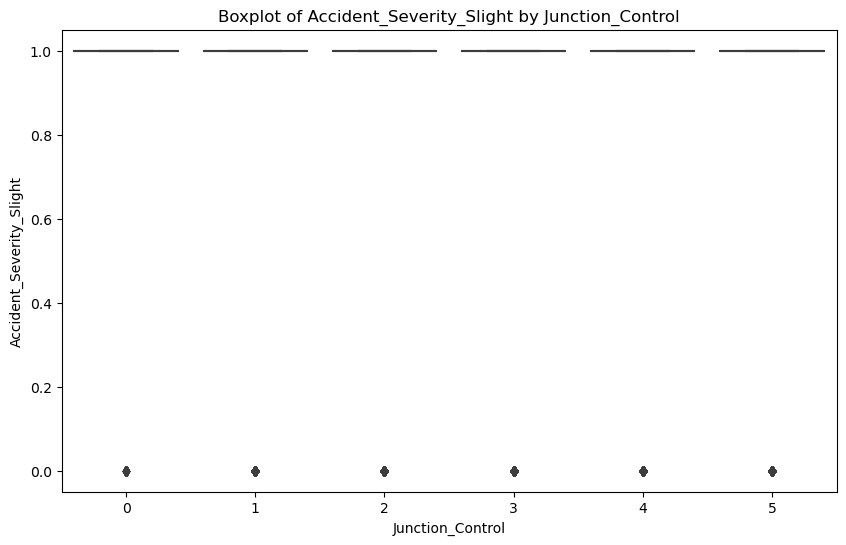

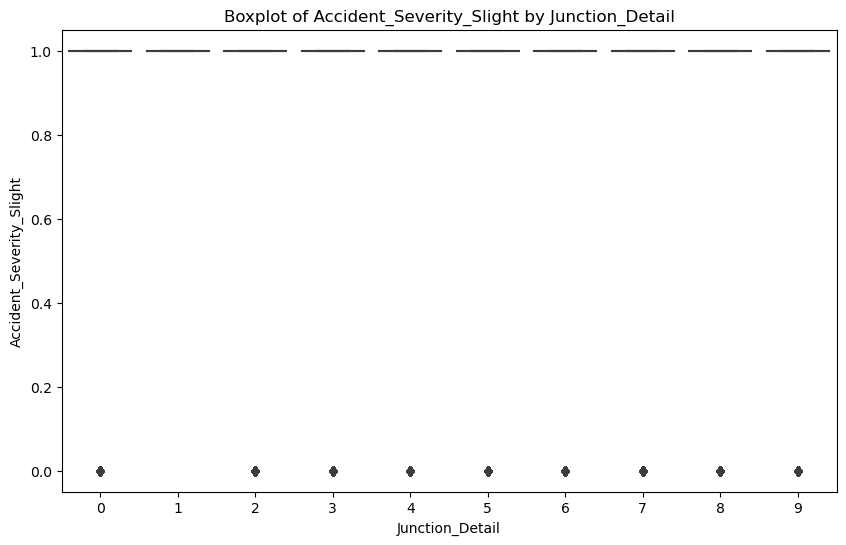

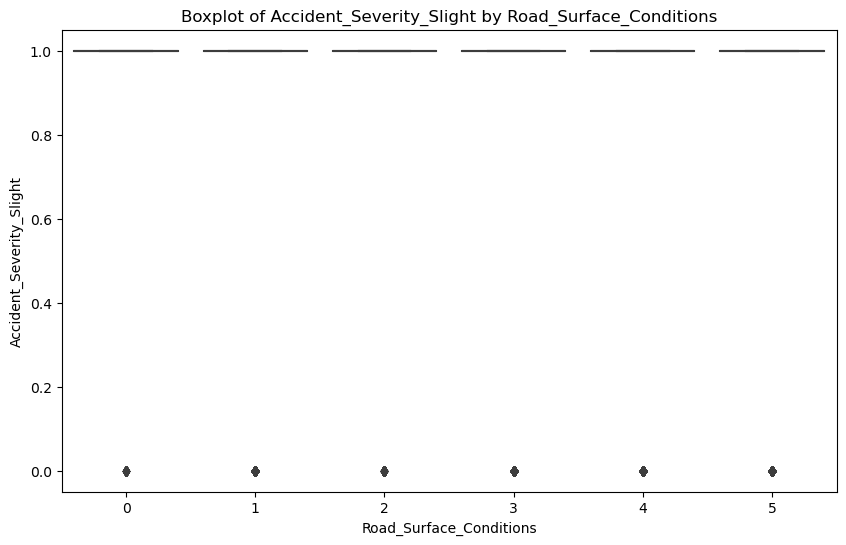

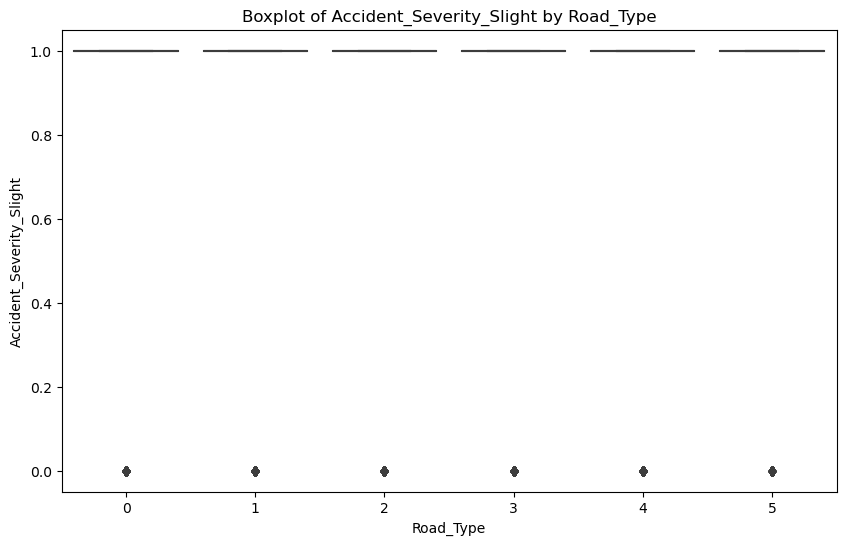

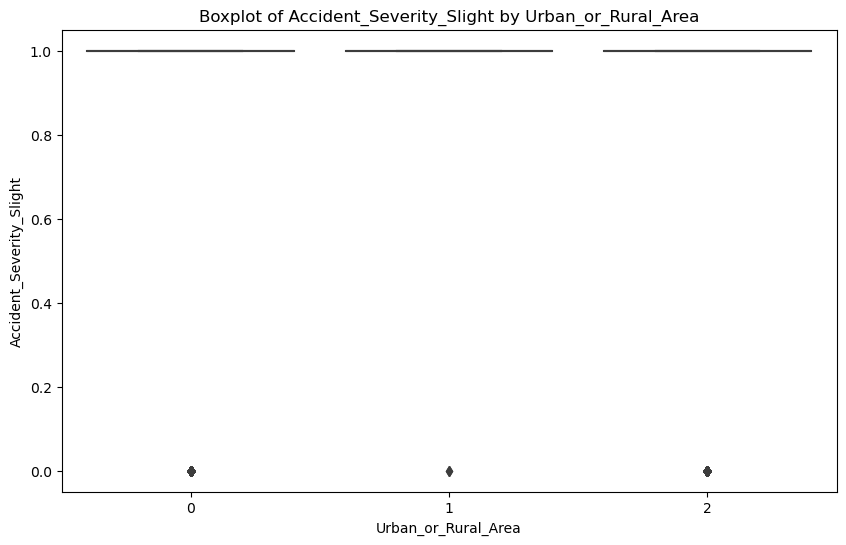

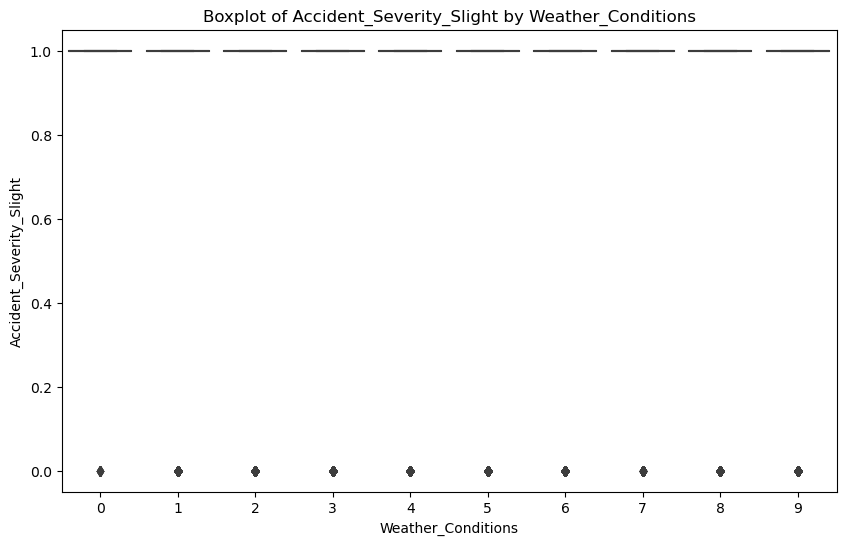

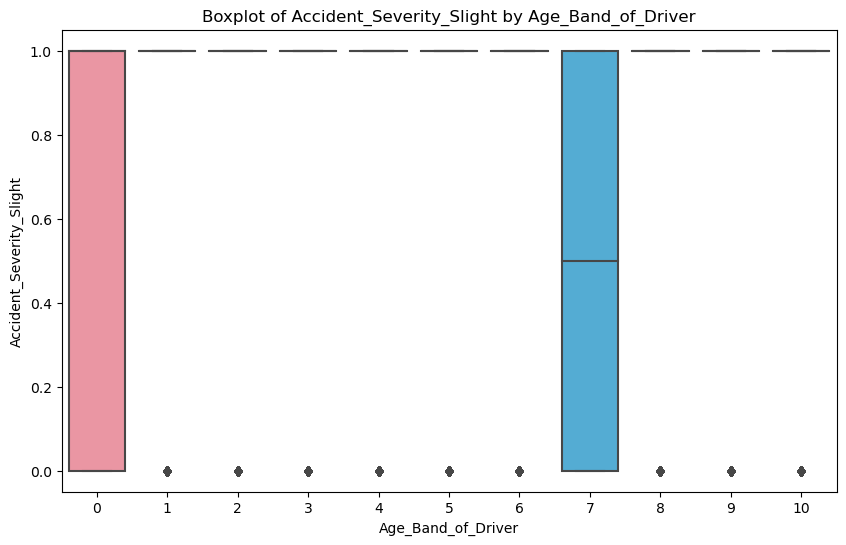

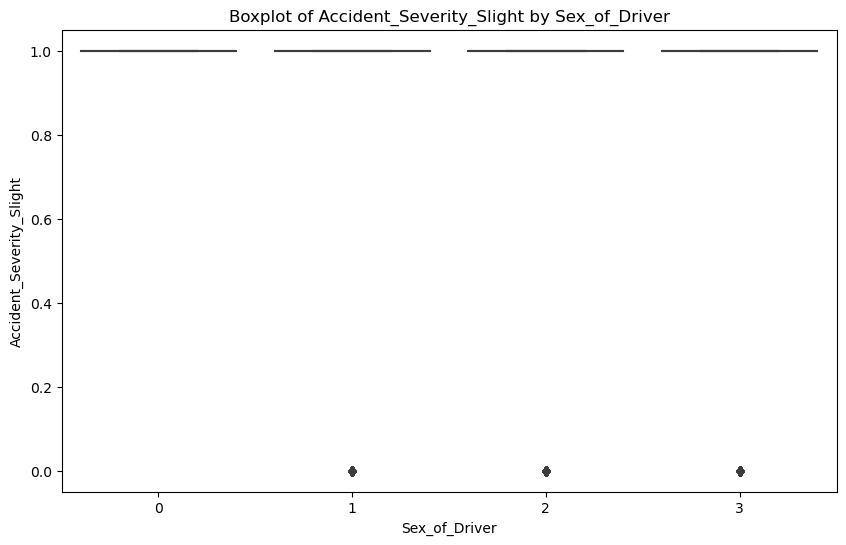

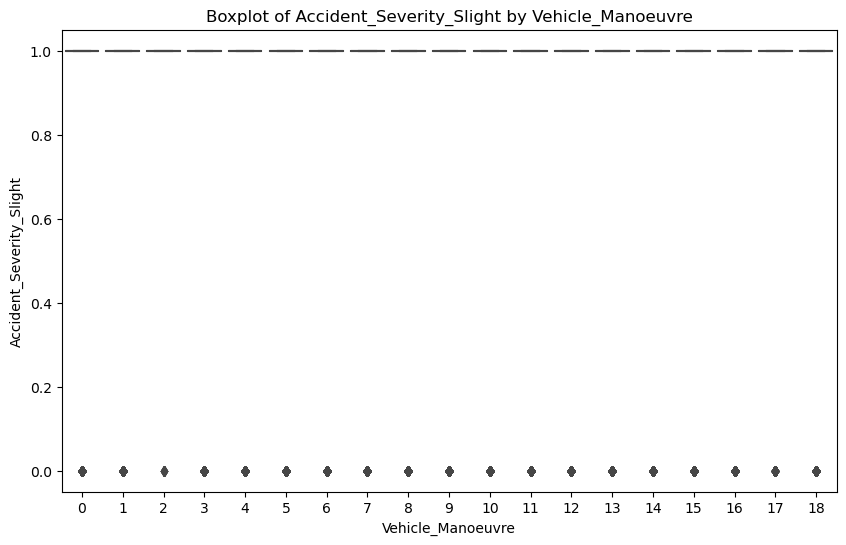

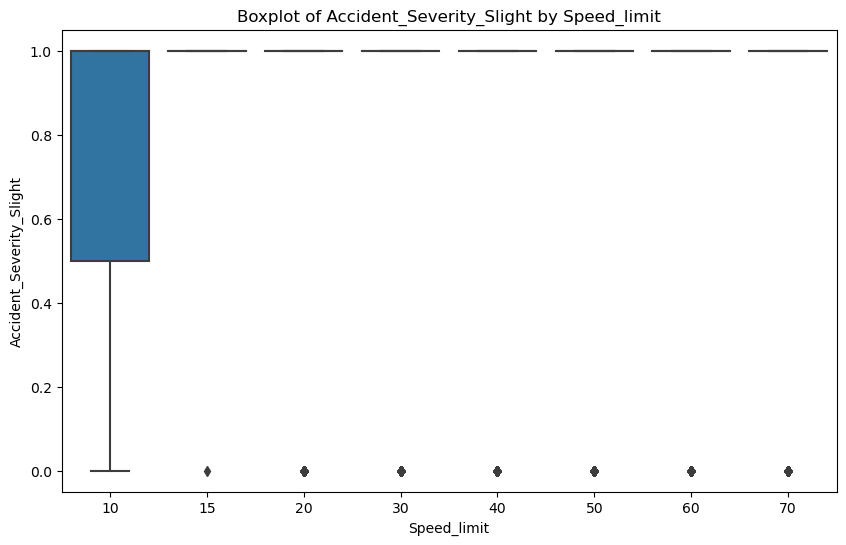

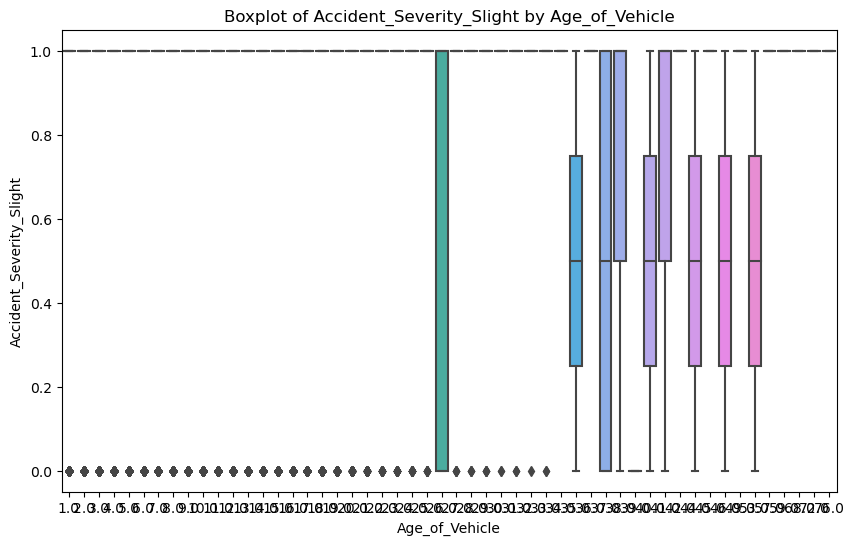

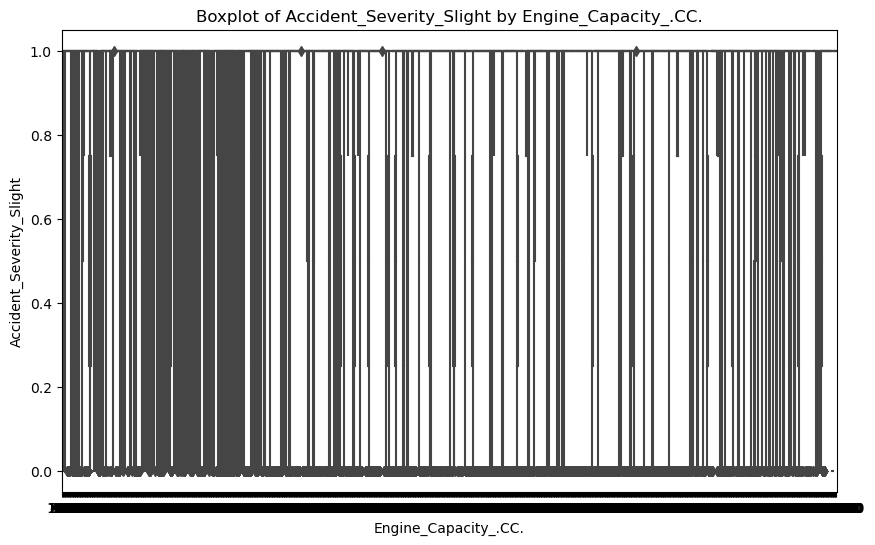

In [34]:
independent_variables = ["Junction_Control",
"Junction_Detail",
"Road_Surface_Conditions",
"Road_Type",
"Urban_or_Rural_Area",
"Weather_Conditions",
"Age_Band_of_Driver",
"Sex_of_Driver",
"Vehicle_Manoeuvre",
"Speed_limit",
"Age_of_Vehicle",
"Engine_Capacity_.CC."]

dependent_variable = 'Accident_Severity_Slight'

for var in independent_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=var, y=dependent_variable, data=df_model)
    plt.title(f'Boxplot of {dependent_variable} by {var}')
    plt.xlabel(var)
    plt.ylabel(dependent_variable)
    plt.show()

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_values = scaler.fit_transform(df_model)

df_scaled = pd.DataFrame(scaled_values, columns=df_model.columns)

df_scaled

,Junction_Control,Junction_Detail,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Age_Band_of_Driver,Sex_of_Driver,Vehicle_Manoeuvre,Accident_Severity_Slight,Speed_limit,Age_of_Vehicle,Engine_Capacity_.CC.
0,0.4,0.444444,0.2,0.6,1.0,0.222222,0.5,0.333333,0.222222,1.0,0.333333,0.040000,0.032383
1,0.4,0.444444,1.0,0.6,1.0,0.666667,0.5,0.666667,0.333333,1.0,0.333333,0.000000,0.054603
2,0.4,0.444444,1.0,0.6,1.0,0.666667,0.3,0.333333,0.222222,1.0,0.333333,0.013333,0.002099
3,0.6,1.000000,0.2,0.6,1.0,0.222222,0.4,0.666667,0.555556,1.0,0.333333,0.040000,0.078352
4,0.4,0.444444,0.2,0.0,1.0,0.222222,0.8,0.666667,0.222222,1.0,0.333333,0.200000,0.098179
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393880,0.6,0.888889,0.8,0.6,0.0,0.222222,0.2,0.333333,0.055556,0.0,0.833333,0.000000,0.032880
393881,0.4,0.444444,0.6,0.6,0.0,0.222222,0.2,0.666667,0.277778,1.0,0.833333,0.146667,0.022681
393882,0.6,1.000000,0.6,0.6,0.0,0.222222,0.3,0.666667,1.000000,1.0,0.333333,0.013333,0.036580
393883,0.6,1.000000,1.0,0.6,0.0,0.222222,0.4,0.666667,0.222222,0.0,0.833333,0.133333,0.017397


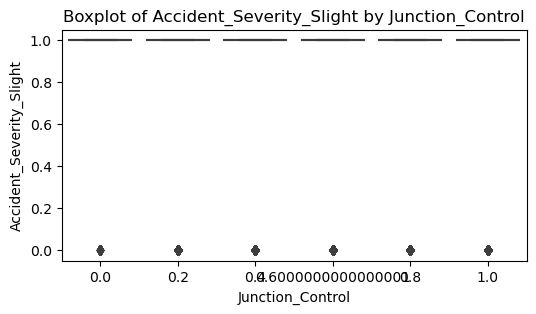

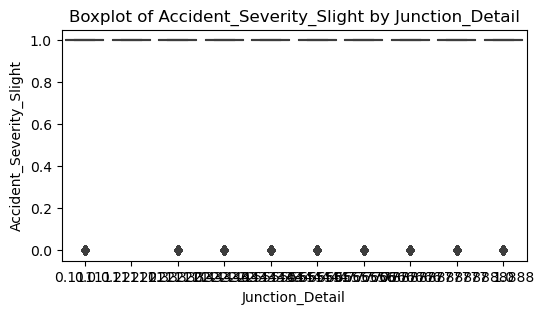

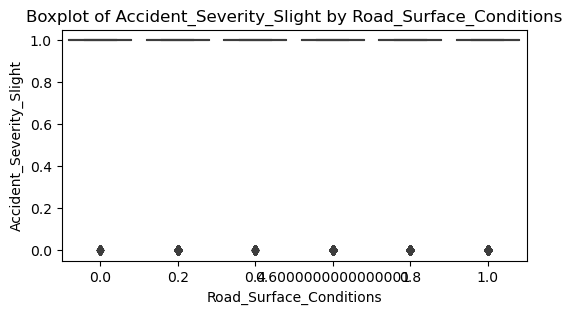

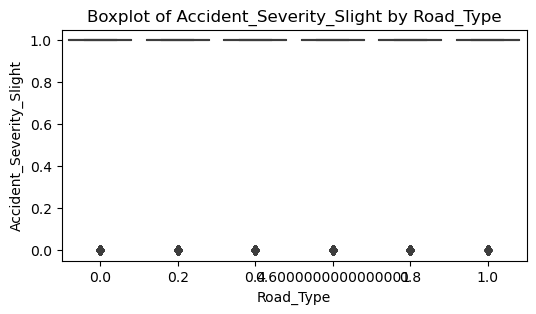

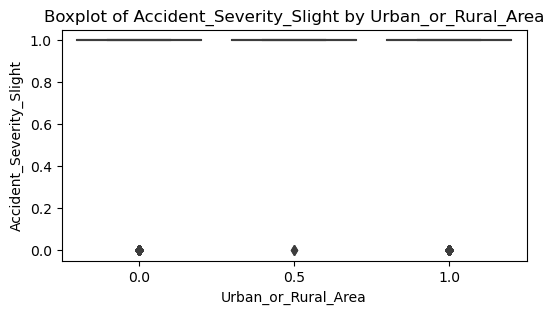

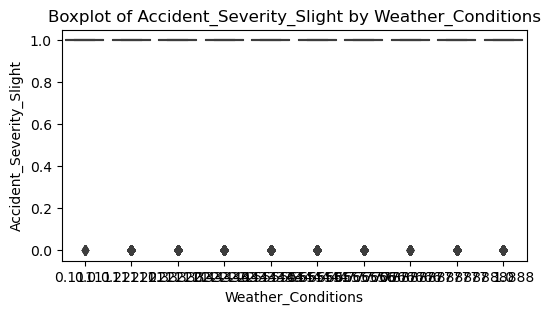

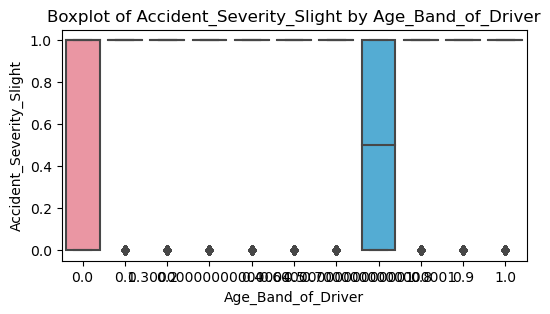

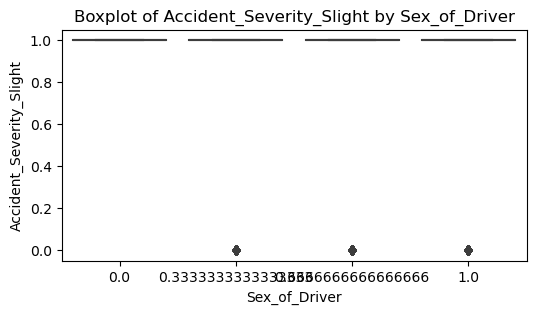

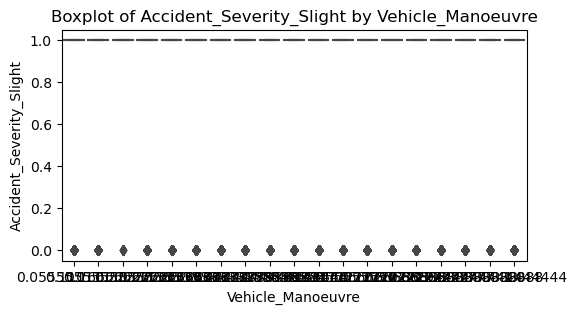

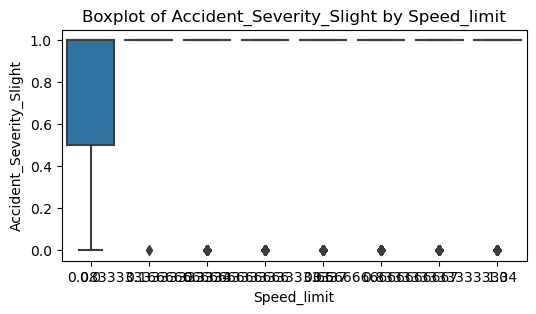

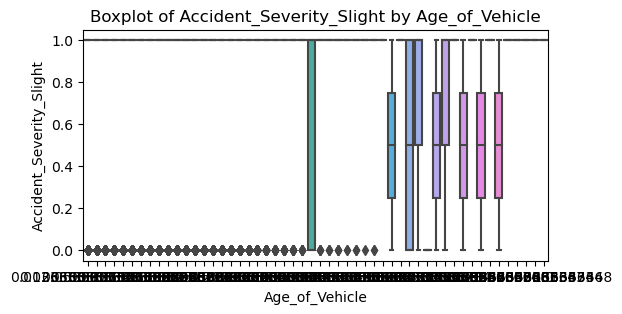

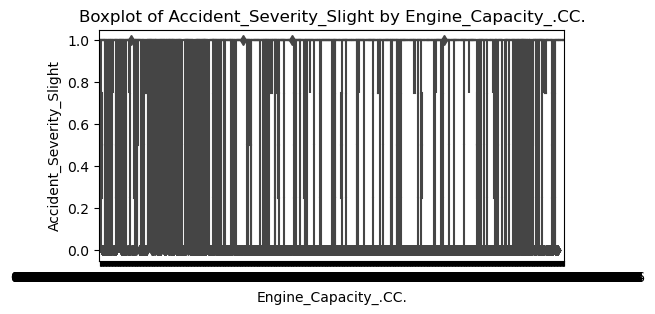

In [36]:
independent_variables = ["Junction_Control",
"Junction_Detail",
"Road_Surface_Conditions",
"Road_Type",
"Urban_or_Rural_Area",
"Weather_Conditions",
"Age_Band_of_Driver",
"Sex_of_Driver",
"Vehicle_Manoeuvre",
"Speed_limit",
"Age_of_Vehicle",
"Engine_Capacity_.CC."]

dependent_variable = 'Accident_Severity_Slight'

for var in independent_variables:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=var, y=dependent_variable, data=df_scaled)
    plt.title(f'Boxplot of {dependent_variable} by {var}')
    plt.xlabel(var)
    plt.ylabel(dependent_variable)
    plt.show()

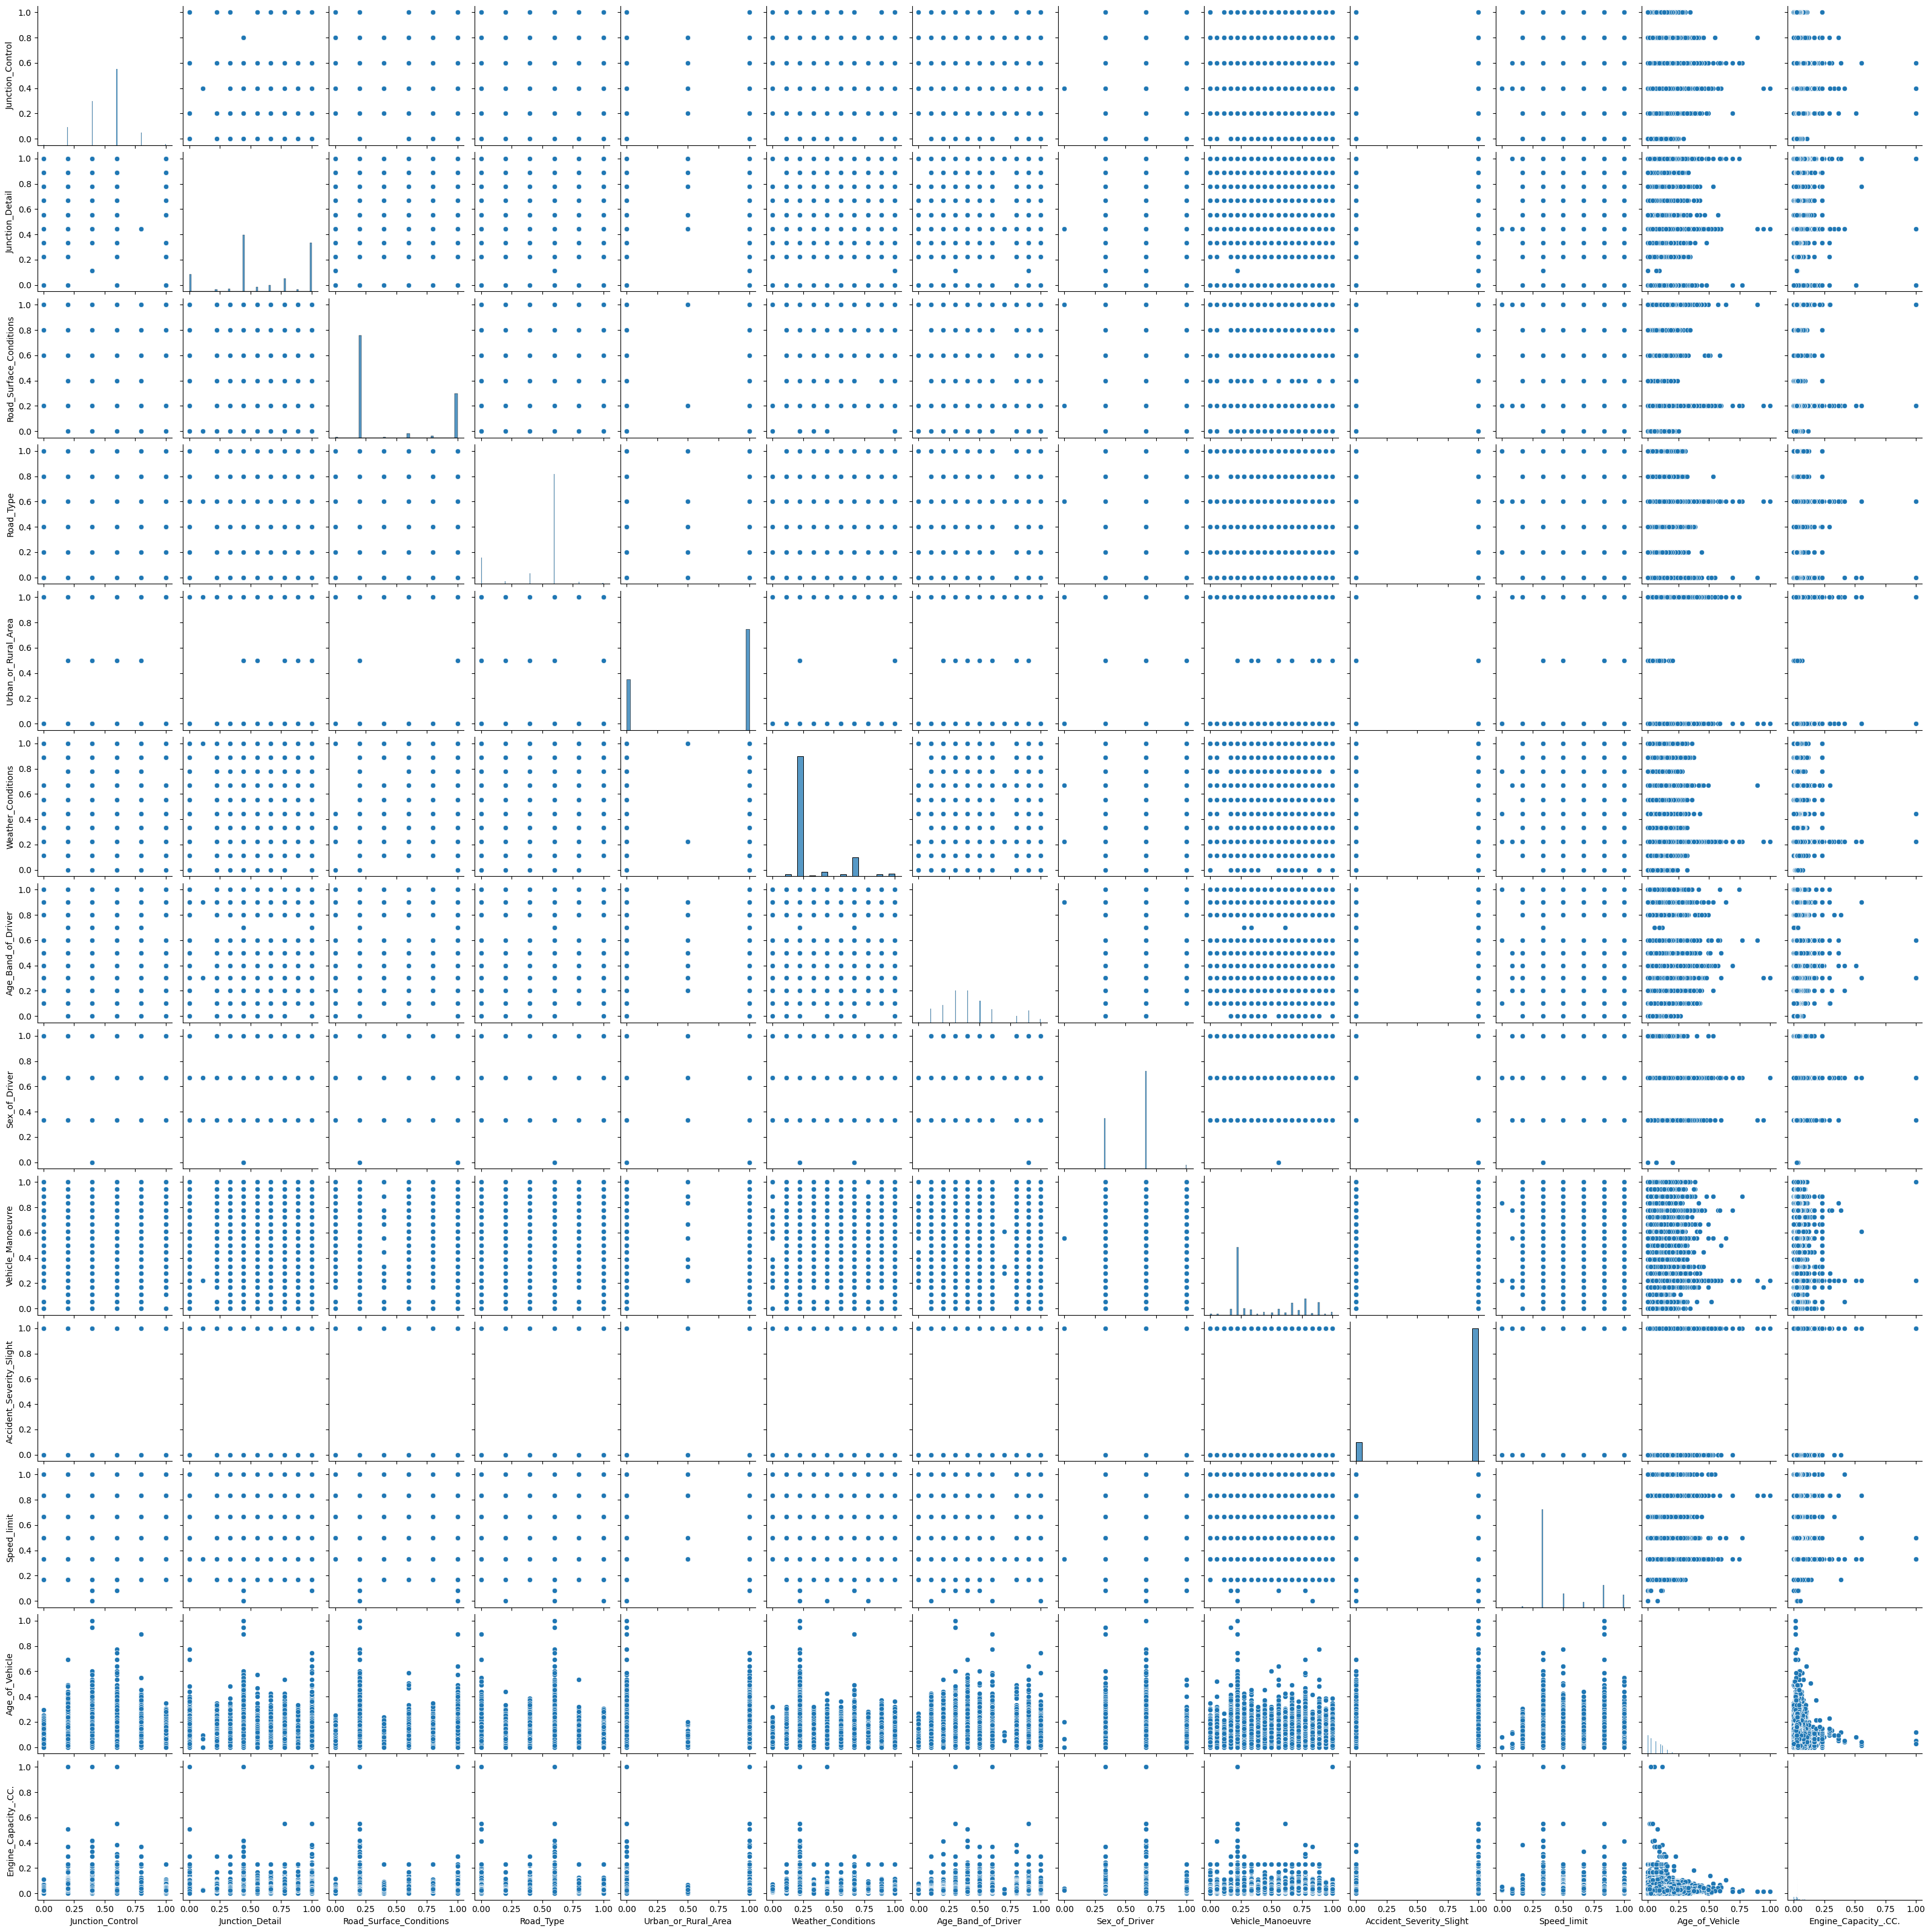

In [37]:
sns.pairplot(df_scaled)

# Feature Importance

[0.01635246 0.02395341 0.01399637 0.01635683 0.00653832 0.02410609
 0.09742994 0.01059612 0.07667735 0.0275254  0.21274141 0.47372631]


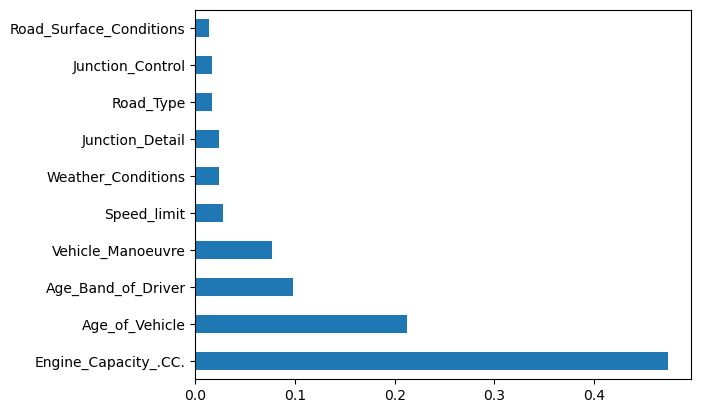

In [38]:
x = df_model.drop("Accident_Severity_Slight",axis=1)
y = df_model["Accident_Severity_Slight"]
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Model Building

In [33]:
from sklearn.model_selection import train_test_split
x = df_model.drop("Accident_Severity_Slight",axis=1)
y = df_model["Accident_Severity_Slight"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 123)

1.LDA

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(x_train, y_train)
lda_pred = lda_model.predict(x_test)
lda_error = np.mean(lda_pred!=y_test)
round(lda_error,3)

0.127

LDA with cross-validation

In [44]:
lda_test_error = []

n_mc = 100
for i in range(n_mc):
    # Split data into training and test sets
    cv_x_train, cv_x_test, cv_y_train, cv_y_test = train_test_split(x, y, test_size=0.2)
    lda_cv = lda.fit(cv_x_train, cv_y_train)
    lda_cv_pred = lda_cv.predict(cv_x_test)
    lda_cv_error = np.mean(lda_cv_pred!=cv_y_test)
    lda_test_error.append(lda_cv_error)
    

lda_e = np.mean(lda_test_error)
print('LDA mean testing error'+ str(round(lda_e,3)))


LDA mean testing error0.126


2.QDA

In [45]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance = True)
qda_model = qda.fit(x_train, y_train)
qda_pred = qda_model.predict(x_test)
qda_error = np.mean(qda_pred!=y_test)
round(qda_error,3)

0.13

QDA with cross-validation

In [39]:
qda_test_error = []

q= 100
for i in range(q):
    cv_x_train, cv_x_test, cv_y_train, cv_y_test = train_test_split(x, y, test_size=0.2)
    qda_cv = qda.fit(cv_x_train, cv_y_train)
    qda_cv_pred = qda_cv.predict(cv_x_test)
    qda_cv_error = np.mean(qda_cv_pred!=cv_y_test)
    qda_test_error.append(qda_cv_error)
    
    
qda_e = np.mean(qda_test_error)
print('QDA mean testing error'+ str(round(qda_e,3)))

QDA mean testing error0.129


3.Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)
nb_pred = nb_model.predict(x_test)
nb_error = np.mean(nb_pred!=y_test)
round(nb_error,3)

0.13

Naive Bayes with cross-validation

In [41]:
nb_test_error = []
n= 100
for i in range(n):
    cv_x_train, cv_x_test, cv_y_train, cv_y_test = train_test_split(x, y, test_size=0.2)
    nb_cv = nb.fit(cv_x_train, cv_y_train)
    nb_cv_pred = nb_cv.predict(cv_x_test)
    nb_cv_error = np.mean(nb_cv_pred!=cv_y_test)
    nb_test_error.append(nb_cv_error)
    
nb_e = np.mean(nb_test_error)
print('Naive Bayes mean testing error'+ str(round(nb_e,3)))

Naive Bayes mean testing error0.129


4.Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr_model = lr.fit(x_train,y_train)
lr_pred = lr_model.predict(x_test)
lr_error = np.mean(lr_pred!=y_test)
round(lr_error,3)

0.127

Logistic Regression with cross-validation

In [43]:
lr_test_error = []
l= 100
lregress = LogisticRegression(random_state = 0)
for i in range(l):
    cv_x_train, cv_x_test, cv_y_train, cv_y_test = train_test_split(x, y, test_size=0.2)
    l_cv = lregress.fit(cv_x_train, cv_y_train)
    l_cv_pred = l_cv.predict(cv_x_test)
    l_cv_error = np.mean(l_cv_pred!=cv_y_test)
    lr_test_error.append(l_cv_error)
    
l_e = np.mean(lr_test_error)
print('Logistic Regression mean testing error'+ str(round(l_e,3)))

Logistic Regression mean testing error0.126


5.KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
k_neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for k in k_neighbors:
    knn_model = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
    knn_pred = knn_model.predict(x_test)
    knn_error = np.mean(knn_pred != y_test)
    print(k)
    print(round(knn_error,3))

1
0.214
2
0.289
3
0.159
4
0.185
5
0.142
6
0.152
7
0.134
8
0.14
9
0.131
10
0.134
11
0.13
12
0.131
13
0.129
14
0.129
15
0.128
16
0.129
17
0.128
18
0.128
19
0.127
20
0.128


KNN with cross validation

In [36]:
knn_test_error = []
k= 100
knn_model_13 = KNeighborsClassifier(n_neighbors = 13)
for i in range(k):
    cv_x_train, cv_x_test, cv_y_train, cv_y_test = train_test_split(x, y, test_size=0.2)
    k_cv = knn_model_13.fit(cv_x_train, cv_y_train)
    k_cv_pred = k_cv.predict(cv_x_test)
    k_cv_error = np.mean(k_cv_pred!=cv_y_test)
    knn_test_error.append(k_cv_error)

knn_e = np.mean(knn_test_error)
print('KNN for n=13 mean testing error'+ str(round(knn_e,3)))

KNN for n=13 mean testing error0.128


Model Performance

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
models =[('LDA',lda),('QDA',qda),('Naive Bayes',nb),('Logistic Regression',lr),('KNN',knn_model_13)]
for name,model in models:
    print(name,model)
    y_pred = model.fit(x_train,y_train).predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    c = confusion_matrix(y_test,y_pred)
    print(f'Model:{name}')
    print(f'Accuracy:{round(accuracy,3)}')
    print(f'Precision:{round(precision,3)}')
    print(f'Recall:{round(recall,3)}')
    print(f'F1:{round(f1,3)}')
    print(f'Confusion Matrix:\n{c}\n')


LDA LinearDiscriminantAnalysis()
Model:LDA
Accuracy:0.873
Precision:0.873
Recall:1.0
F1:0.932
Confusion Matrix:
[[    0  9984]
 [    0 68793]]

QDA QuadraticDiscriminantAnalysis(store_covariance=True)
Model:QDA
Accuracy:0.87
Precision:0.874
Recall:0.995
F1:0.93
Confusion Matrix:
[[   92  9892]
 [  339 68454]]

Naive Bayes GaussianNB()
Model:Naive Bayes
Accuracy:0.87
Precision:0.874
Recall:0.995
F1:0.93
Confusion Matrix:
[[   72  9912]
 [  319 68474]]

Logistic Regression LogisticRegression(random_state=0)
Model:Logistic Regression
Accuracy:0.873
Precision:0.873
Recall:1.0
F1:0.932
Confusion Matrix:
[[    0  9984]
 [    0 68793]]

KNN KNeighborsClassifier(n_neighbors=13)
Model:KNN
Accuracy:0.871
Precision:0.875
Recall:0.994
F1:0.931
Confusion Matrix:
[[  244  9740]
 [  386 68407]]



6. Random Forest Classifier

In [39]:
# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

#Fit the random forest model on the training data
rf_model = rf.fit(x_train, y_train)

#Make predictions on the testing data
y_pred_rf = rf_model.predict(x_test)

#Evaluate the error of the random forest model
rf_error = np.mean(y_pred_rf!=y_test)
print('Random Forest Classifier mean testing error'+ str(round(rf_error,3)))
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test,y_pred_rf)
recall = recall_score(y_test,y_pred_rf)
f1 = f1_score(y_test,y_pred_rf)
c = confusion_matrix(y_test,y_pred_rf)
print(f'Accuracy:{round(accuracy,3)}')
print(f'Precision:{round(precision,3)}')
print(f'Recall:{round(recall,3)}')
print(f'F1:{round(f1,3)}')
print(f'Confusion Matrix:\n{c}\n')


Random Forest Classifier mean testing error0.145
Accuracy:0.855
Precision:0.877
Recall:0.97
F1:0.921
Confusion Matrix:
[[  620  9364]
 [ 2098 66695]]



7. Gradient Boosting Classifier

In [40]:
gb = GradientBoostingClassifier(n_estimators = 100, random_state =42)

#Fit the boosting model on the training data
gb_model = gb.fit(x_train, y_train)

#Make predictions on the testing data
y_pred_gb = gb_model.predict(x_test)

#Evaluate the error of the Gradient Boosting Classifier
gb_error = np.mean(y_test!=y_pred_gb)
print('Gradient Boosting Classifier mean testing error'+ str(round(gb_error,3)))
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test,y_pred_gb)
recall = recall_score(y_test,y_pred_gb)
f1 = f1_score(y_test,y_pred_gb)
c = confusion_matrix(y_test,y_pred_gb)
print(f'Accuracy:{round(accuracy,3)}')
print(f'Precision:{round(precision,3)}')
print(f'Recall:{round(recall,3)}')
print(f'F1:{round(f1,3)}')
print(f'Confusion Matrix:\n{c}\n')


Gradient Boosting Classifier mean testing error0.126
Accuracy:0.874
Precision:0.875
Recall:0.998
F1:0.932
Confusion Matrix:
[[  137  9847]
 [  104 68689]]



Hypertuning

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define parameter distributions for random forests and boosting
param_dist_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf': [1,2,4]
}
param_dist_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10, None],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1,2,4]
}
# Perform randomized search for random forests and boosting
rf = RandomForestClassifier(random_state = 42)
gb = GradientBoostingClassifier(random_state = 42)

search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, cv=3, n_iter=10, random_state = 42)
search_gb = RandomizedSearchCV(gb, param_distributions = param_dist_gb, cv=3, n_iter = 10, random_state = 42)

search_rf.fit(x_train, y_train)
search_gb.fit(x_train, y_train)

print("Random Forest Best Parameters:", search_rf.best_params_)
print("Boosting Best Parameters:", search_gb.best_params_)

Random Forest Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}
Boosting Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.05}


In [41]:
# Create a random forest classifier after hypertuning
rf1 = RandomForestClassifier(n_estimators = 50, min_samples_split = 5, min_samples_leaf = 1, max_depth = 10, random_state = 42)

#Fit the random forest model on the training data
rf_model1 = rf1.fit(x_train, y_train)

#Make predictions on the testing data
y_pred_rf1 = rf_model1.predict(x_test)

#Evaluate the error of the random forest model
rf_error1 = np.mean(y_pred_rf1!=y_test)
round(rf_error1,3)

accuracy = accuracy_score(y_test, y_pred_rf1)
precision = precision_score(y_test,y_pred_rf1)
recall = recall_score(y_test,y_pred_rf1)
f1 = f1_score(y_test,y_pred_rf1)
c = confusion_matrix(y_test,y_pred_rf1)
print(f'Accuracy:{round(accuracy,3)}')
print(f'Precision:{round(precision,3)}')
print(f'Recall:{round(recall,3)}')
print(f'F1:{round(f1,3)}')
print(f'Confusion Matrix:\n{c}\n')


Accuracy:0.873
Precision:0.874
Recall:1.0
F1:0.932
Confusion Matrix:
[[   32  9952]
 [   18 68775]]



In [42]:
# Create a gradient boosting classifier after hypertuning
gb1 = GradientBoostingClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_depth = 5, learning_rate =0.05, random_state =42)

#Fit the boosting model on the training data
gb_model1 = gb1.fit(x_train, y_train)

#Make predictions on the testing data
y_pred_gb1 = gb_model1.predict(x_test)

#Evaluate the error of the Gradient Boosting Classifier
gb_error1 = np.mean(y_test!=y_pred_gb1)
round(gb_error1,3)
accuracy = accuracy_score(y_test, y_pred_gb1)
precision = precision_score(y_test,y_pred_gb1)
recall = recall_score(y_test,y_pred_gb1)
f1 = f1_score(y_test,y_pred_gb1)
c = confusion_matrix(y_test,y_pred_gb1)
print(f'Accuracy:{round(accuracy,3)}')
print(f'Precision:{round(precision,3)}')
print(f'Recall:{round(recall,3)}')
print(f'F1:{round(f1,3)}')
print(f'Confusion Matrix:\n{c}\n')


Accuracy:0.874
Precision:0.875
Recall:0.998
F1:0.932
Confusion Matrix:
[[  166  9818]
 [  142 68651]]

